# **Тестовое задание** 

Дано видео, необходимо:

1) взять каждый 15 кадр из него и согласно координатам
(xmin,ymin = 115, 210, xmax, ymax = 350, 445) вырезать картинку и сделать решейп на 116*116, сохранить данные изображения в папке;

2) в ручную рассортировать в две папки: первая -- где есть человек на рабочем месте, вторая -- где пустой стол;

3) мы получили базу из двух папок, обучить на ней нейронную сеть классификатор на keras и pytorch (чем меньше будет модель тем лучше).

Данные для задачи: https://disk.yandex.ru/d/zrh9-rYmgRgxPQ 

Результаты выслать на почту: k73.kondrashov@gmail.com

In [3]:
#загрузка необходимых библиотек и модулей
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Создание датасета из подготовленных изображений

In [4]:
# путь к видео
#video_path = '/content/drive/MyDrive/Test/Camera 3_20220526_003249.mp4'
video_path = '/content/drive/MyDrive/Test/movie.mp4'

# директория для хранения обработанных картинок
os.mkdir('/content/drive/MyDrive/Test/Frames')

frames_path = '/content/drive/MyDrive/Test/Frames'

In [5]:
# Объект VideoCapture для захвата видео
cap = cv2.VideoCapture(video_path)

# количество кадров
frame_count = cap.get(7)
print("Количество кадров: ", int(frame_count))

Количество кадров:  282000


Text(0.5, 1.0, 'frame crop resize: (116, 116, 3)')

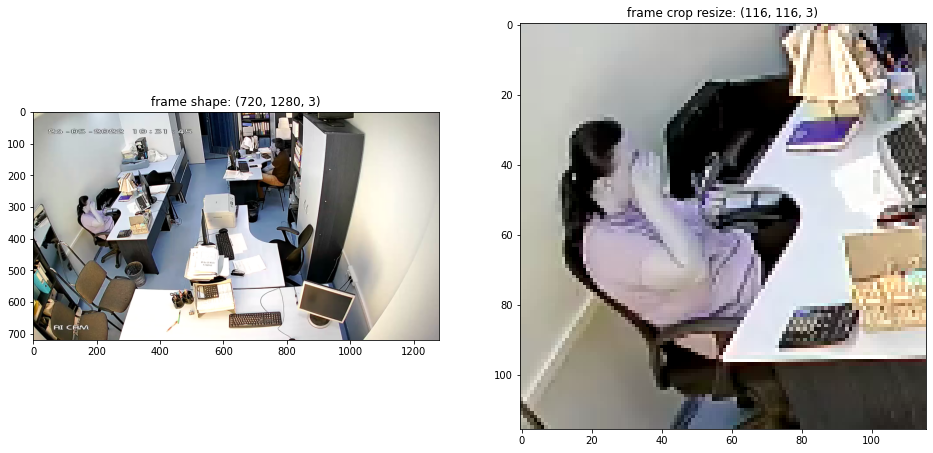

In [6]:
# Просмотр данных
cap.set(cv2.CAP_PROP_POS_FRAMES, 90000)

fig = plt.figure(figsize=(16, 8))
ax_1 = fig.add_subplot(1, 2, 1)
_, frame = cap.read()
plt.imshow(frame)
plt.title(f'frame shape: {frame.shape}')

frame_crop = frame[210:445,115:350]
frame_crop_resize = cv2.resize(frame_crop, (116,116))
ax_2 = fig.add_subplot(1, 2, 2)
plt.imshow(frame_crop_resize)
plt.title(f'frame crop resize: {frame_crop_resize.shape}')

In [ ]:
# Сохранение фреймов в папку
for i in range(int(frame_count)):
  if i % 15 == 0:
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)
    _, frame = cap.read()
    frame_crop = frame[210:445,115:350]
    frame_crop_resize = cv2.resize(frame_crop, (116,116))
    cv2.imwrite(f'{frames_path}/image_{i}.jpg', frame_crop_resize)    

#2. Ручное разделение данных (человек на рабочем месте, пустой стол) 

In [7]:
# пути к данным
data_dir = '/content/drive/MyDrive/Test/'
frames_man_path = '/content/drive/MyDrive/Test/Man/'
frames_notman_path = '/content/drive/MyDrive/Test/NotMan/'

Подготовка датасета

In [8]:
# создаем датасет с размеченными данными
import pandas as pd

df_man = pd.DataFrame({'File': [frames_man_path+i for i in os.listdir(frames_man_path)], 'Class': [1]*len(os.listdir(frames_man_path))})
df_man

,File,Class
0,/content/drive/MyDrive/Test/Man/image_264450.jpg,1
1,/content/drive/MyDrive/Test/Man/image_264465.jpg,1
2,/content/drive/MyDrive/Test/Man/image_264480.jpg,1
3,/content/drive/MyDrive/Test/Man/image_264495.jpg,1
4,/content/drive/MyDrive/Test/Man/image_264510.jpg,1
...,...,...
11425,/content/drive/MyDrive/Test/Man/image_71610.jpg,1
11426,/content/drive/MyDrive/Test/Man/image_71475.jpg,1
11427,/content/drive/MyDrive/Test/Man/image_71850.jpg,1
11428,/content/drive/MyDrive/Test/Man/image_71490.jpg,1


In [9]:
df_not_man = pd.DataFrame({'File': [frames_notman_path+i for i in os.listdir(frames_notman_path)], 'Class': [0]*len(os.listdir(frames_notman_path))})
df_not_man

,File,Class
0,/content/drive/MyDrive/Test/NotMan/image_41085...,0
1,/content/drive/MyDrive/Test/NotMan/image_41100...,0
2,/content/drive/MyDrive/Test/NotMan/image_41115...,0
3,/content/drive/MyDrive/Test/NotMan/image_41130...,0
4,/content/drive/MyDrive/Test/NotMan/image_41145...,0
...,...,...
7365,/content/drive/MyDrive/Test/NotMan/image_48975...,0
7366,/content/drive/MyDrive/Test/NotMan/image_49185...,0
7367,/content/drive/MyDrive/Test/NotMan/image_49035...,0
7368,/content/drive/MyDrive/Test/NotMan/image_48915...,0


In [10]:
df_train = pd.concat([df_man[len(df_man)//5:],df_not_man[len(df_not_man)//5:]], axis=0, ignore_index=True)
df_valid = pd.concat([df_man[0:len(df_man)//5],df_not_man[0:len(df_not_man)//5]], axis=0, ignore_index=True)

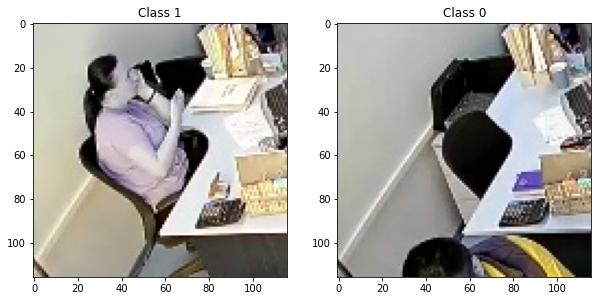

In [11]:
# Просмотр загруженных данных
image_1 = cv2.imread(df_train['File'].head(1).values[0], cv2.COLOR_BGR2RGB)
image_0 = cv2.imread(df_train['File'].tail(1).values[0], cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image_1)
ax[0].set_title(f'Class {df_train["Class"].head(1).values[0]}')
ax[1].imshow(image_0)
ax[1].set_title(f'Class {df_train["Class"].tail(1).values[0]}')
plt.show()

#3. Обучение классификатора

## 3.1. Классификатор на Keras

In [ ]:
import tensorflow as tf
from keras.models import Sequential

In [ ]:
BATCH_SIZE = 32

**Подготовка данных**

In [ ]:
# Тренировочный датасет
df_train_keras = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  batch_size=BATCH_SIZE)

Found 18800 files belonging to 2 classes.
Using 15040 files for training.


In [ ]:
# Валидационный датасет
df_valid_keras = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=BATCH_SIZE)

Found 18800 files belonging to 2 classes.
Using 3760 files for validation.


In [ ]:
# Классы
class_names = df_train_keras.class_names
print(class_names)

['Man', 'NotMan']


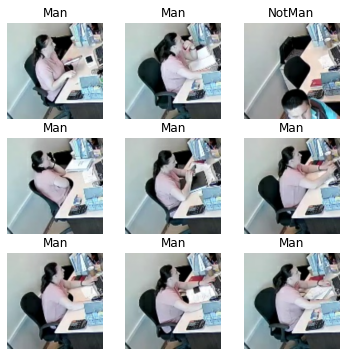

In [ ]:
# Визуализация данных датасета
plt.figure(figsize=(6, 6))
for images, labels in df_train_keras.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Создание, компиляция и обучение модели**

In [ ]:
# Построение модели
num_classes = len(class_names)

model_keras = Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
# Компиляция модели
model_keras.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Обучение модели
epochs=10
history = model_keras.fit(
  df_train_keras,
  validation_data=df_valid_keras,
  epochs=epochs
)

Epoch 1/10
470/470 [==============================] - 755s 2s/step - loss: 0.0620 - accuracy: 0.9901 - val_loss: 0.0070 - val_accuracy: 0.9981
Epoch 2/10
470/470 [==============================] - 43s 91ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0044 - val_accuracy: 0.9989
Epoch 3/10
470/470 [==============================] - 42s 89ms/step - loss: 0.0026 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9989
Epoch 4/10
470/470 [==============================] - 43s 91ms/step - loss: 0.0044 - accuracy: 0.9989 - val_loss: 0.0026 - val_accuracy: 0.9992
Epoch 5/10
470/470 [==============================] - 48s 102ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9989
Epoch 6/10
470/470 [==============================] - 43s 91ms/step - loss: 7.5392e-04 - accuracy: 0.9998 - val_loss: 0.0037 - val_accuracy: 0.9992
Epoch 7/10
470/470 [==============================] - 44s 92ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0077 - val_accur

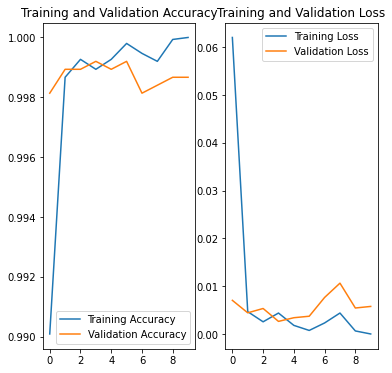

In [ ]:
# Визуализация результатов обучения
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**Сохранение модели**

In [ ]:
model_keras.save(data_dir)

## 3.2. Классификатор на PyTorch



In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [13]:
BATCH_SIZE = 8

**Подготовка данных**

In [16]:
# Класс датасета
class CustomDataset(Dataset):
    def __init__(self, data):
        # загружаем данные из датасета
        self.data = data
        self.image_arr = self.data.iloc[:,0] # имена файлов картинок из датасета
        self.label_arr = self.data.iloc[:,1] # номера классов из датасета
        self.data_len = len(self.data.index)
        
    def __len__(self):
        return self.data_len
        
    def __getitem__(self, index):
       # загружаем картинки
        img = cv2.imread(self.image_arr[index]) 
        img = np.asarray(img).astype('float')
        img = torch.as_tensor(img)
        img /= 255.0
        img = img.permute(2,0,1)
        
        # загружаем классы
        label = self.label_arr[1]
        label = label.astype('float')
        label = torch.as_tensor(label, dtype=torch.uint8)
                
        return img.float(), label

In [14]:
classes = ['NotMan', 'Man']

In [17]:
# Cоздаем датасеты
df_train_torch = CustomDataset(df_train)
df_valid_torch = CustomDataset(df_valid)

# Cоздаем даталодеры
df_train_torch_loader = DataLoader(df_train_torch, batch_size=BATCH_SIZE, shuffle=True)
df_valid_torch_loader = DataLoader(df_valid_torch, batch_size=BATCH_SIZE, shuffle=False)

torch.Size([8, 3, 116, 116]) torch.Size([8])


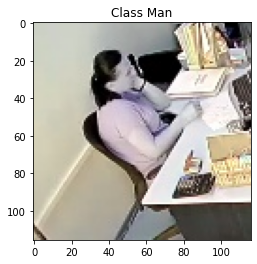

In [19]:
# Просмотр данных из даталоадера
for img, label in df_train_torch_loader:
  print(img.shape, label.shape)
  plt.imshow(img[0].permute(1, 2, 0))
  plt.title(f'Class {classes[label[0]]}')
  break

In [20]:
train_features, train_labels = next(iter(df_train_torch_loader))
print(train_features.shape, train_labels.shape)
train_features, train_labels

torch.Size([8, 3, 116, 116]) torch.Size([8])


(tensor([[[[0.7922, 0.7922, 0.7882,  ..., 0.4078, 0.3961, 0.4078],
           [0.7922, 0.7922, 0.7922,  ..., 0.3333, 0.3882, 0.3961],
           [0.7922, 0.7922, 0.7922,  ..., 0.2941, 0.4627, 0.4275],
           ...,
           [0.8000, 0.7843, 0.5176,  ..., 0.2510, 0.2353, 0.2392],
           [0.7843, 0.7725, 0.6745,  ..., 0.2392, 0.2353, 0.2353],
           [0.7608, 0.6863, 0.7216,  ..., 0.2235, 0.2353, 0.2314]],
 
          [[0.8078, 0.8078, 0.8039,  ..., 0.4235, 0.4118, 0.4235],
           [0.8078, 0.8078, 0.8078,  ..., 0.3490, 0.4039, 0.4118],
           [0.8078, 0.8078, 0.8078,  ..., 0.3020, 0.4706, 0.4353],
           ...,
           [0.7725, 0.7569, 0.4745,  ..., 0.2549, 0.2392, 0.2431],
           [0.7569, 0.7451, 0.6314,  ..., 0.2431, 0.2392, 0.2392],
           [0.7333, 0.6588, 0.6784,  ..., 0.2275, 0.2392, 0.2353]],
 
          [[0.7647, 0.7647, 0.7608,  ..., 0.4275, 0.4157, 0.4275],
           [0.7647, 0.7647, 0.7647,  ..., 0.3529, 0.4078, 0.4157],
           [0.7647, 0.76

**Создание, компиляция и обучение модели**

In [207]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.pool = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(10816, 128)
    self.fc2 = nn.Linear(128, 2)

  def forward(self, x):
    x = self.pool(self.conv1(x))
    x = self.pool(self.conv2(x))
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model_torch = Net()

In [208]:
import torch.optim as optim

# компиляция модели
optimizer = torch.optim.Adam(model_torch.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [209]:
# обучение и валидация модели
def train_eval_model(net, num_epochs, train_loader, valid_loader):
  for epoch in range(num_epochs):  
    net.train()
    running_loss, running_items, running_right = 0.0, 0.0, 0.0
    for i, data in enumerate(train_loader, 0):
      inputs, labels = data[0], data[1]

       # обучение
      optimizer.zero_grad()
      outputs = net(inputs)
      class_id = torch.argmax(outputs, dim=1)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

       # выводим статистику о процессе обучения
      running_loss += loss.item()
      running_items += len(labels)
      running_right += (labels == torch.max(outputs, 1)[1]).sum()

            # выводим статистику о процессе обучения
      if i % 300 == 0:    # печатаем каждые 300 mini-batches
          net.eval()

          print(f'Epoch [{epoch + 1}/{num_epochs}]. ' \
                f'Step [{i + 1}/{len(train_loader)}]. ' \
                f'Loss: {running_loss / running_items:.3f}. ' \
                f'Acc: {running_right / running_items:.3f}', end='. ')
          running_loss, running_items, running_right = 0.0, 0.0, 0.0

          test_running_right, test_running_total = 0.0, 0.0
          for i, data in enumerate(valid_loader):

            test_outputs = net(data[0])
            test_running_total += len(data[1])
            test_running_right += (data[1] == torch.max(test_outputs, 1)[1]).sum()

          print(f'Test acc: {test_running_right / test_running_total:.3f}')
  print('Training is finished!')

In [210]:
# обучение модели
epochs = 10
train_eval_model(model_torch, epochs, df_train_torch_loader, df_valid_torch_loader)

Epoch [1/10]. Step [1/1880]. Loss: 0.087. Acc: 0.250. Test acc: 1.000
Epoch [1/10]. Step [301/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [1/10]. Step [601/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [1/10]. Step [901/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [1/10]. Step [1201/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [1/10]. Step [1501/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [1/10]. Step [1801/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [2/10]. Step [1/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [2/10]. Step [301/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [2/10]. Step [601/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [2/10]. Step [901/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [2/10]. Step [1201/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [2/10]. Step [1501/1880]. Loss: 0.000. Acc: 1.000. Test acc: 1.000
Epoch [2/10]. Step [1801/1880]. Loss: 0.000. Acc: 1.000. Test a

Истинные классы:  Man Man Man Man Man Man Man Man


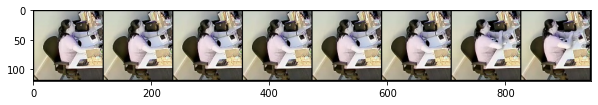

In [212]:
# Валидация модели
import torchvision
# Изображения из валидационного набора
dataiter = iter(df_valid_torch_loader)
images, labels = dataiter.next()

imgs = torchvision.utils.make_grid(images)

plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('Истинные классы: ', ' '.join(classes[labels[j]] for j in range(len(labels))))

In [213]:
# Предсказание модели (верояности принадлежности объекта к классу)
model_torch.eval()
outputs = model_torch(images)

# Получение предсказания название класса
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(classes[predicted[j]] for j in range(len(labels))))

Predicted:  Man Man Man Man Man Man Man Man


In [214]:
# результаты модели
gt = np.array([classes[labels[j]] for j in range(len(labels))])
pred = np.array([classes[predicted[j]] for j in range(len(labels))])

print(gt)
print(pred)
print(f'Accuracy is {(gt == pred).sum() / len(gt)}')

['Man' 'Man' 'Man' 'Man' 'Man' 'Man' 'Man' 'Man']
['Man' 'Man' 'Man' 'Man' 'Man' 'Man' 'Man' 'Man']
Accuracy is 1.0


**Сохранение модели**

In [218]:
# Сохранение модели
torch.save(model_torch, data_dir+'model_torch.pth')